In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 3)
plt.style.use(style='fast')
print(plt.style.available)

['seaborn-bright', 'seaborn-deep', 'fast', 'classic', 'seaborn-colorblind', 'seaborn-ticks', 'seaborn-muted', 'seaborn-pastel', 'ggplot', 'seaborn-white', 'seaborn-darkgrid', 'seaborn-paper', 'seaborn-notebook', 'seaborn-talk', 'grayscale', 'seaborn-dark-palette', 'seaborn-poster', '_classic_test', 'Solarize_Light2', 'dark_background', 'seaborn', 'seaborn-whitegrid', 'bmh', 'fivethirtyeight', 'seaborn-dark']


In [39]:
w12 = pd.read_csv('weather_2012.csv')

In [40]:
w12.index = w12['Date/Time']

In [41]:
w12 = w12.drop(['Date/Time'], axis=1)

In [42]:
w12 = w12.dropna(axis=1, how='any')

In [43]:
march = w12[(w12.index >= '2012-03-01') & (w12.index <= '2012-03-31')]

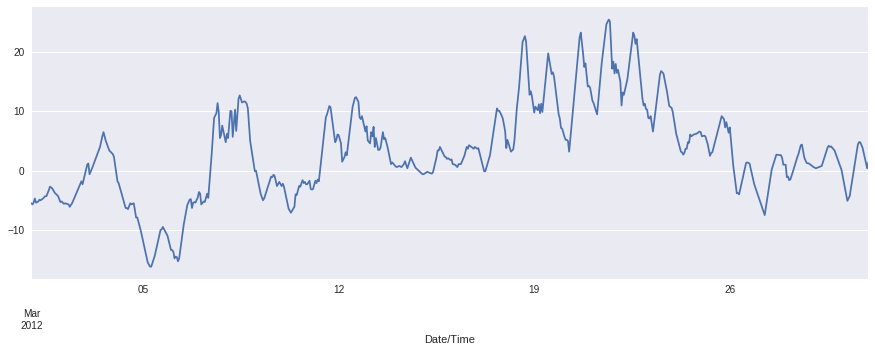

In [63]:
march["Temp (C)"].plot(figsize=(15, 5))

In [45]:
w12[:3]

,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
Date/Time,,,,,,,
2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"


In [46]:
temps = march[['Temp (C)']].copy()

In [47]:
march.index = pd.to_datetime(march.index)

In [48]:
temps.info()

<class 'pandas.core.frame.DataFrame'>
Index: 720 entries, 2012-03-01 00:00:00 to 2012-03-30 23:00:00
Data columns (total 1 columns):
Temp (C)    720 non-null float64
dtypes: float64(1)
memory usage: 11.2+ KB


In [49]:
march.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 720 entries, 2012-03-01 00:00:00 to 2012-03-30 23:00:00
Data columns (total 7 columns):
Temp (C)              720 non-null float64
Dew Point Temp (C)    720 non-null float64
Rel Hum (%)           720 non-null int64
Wind Spd (km/h)       720 non-null int64
Visibility (km)       720 non-null float64
Stn Press (kPa)       720 non-null float64
Weather               720 non-null object
dtypes: float64(4), int64(2), object(1)
memory usage: 45.0+ KB


In [50]:
temps.loc[:, 'Hour'] = march.index.hour

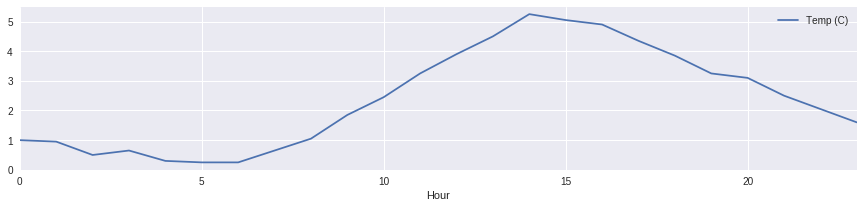

In [64]:
temps.groupby('Hour').aggregate(np.median).plot()

# Pandas - Working w/ Strings

In [52]:
w12[:3]

,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
Date/Time,,,,,,,
2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"


In [53]:
weather_description = w12['Weather']

In [54]:
weather_description[:3]

Date/Time
2012-01-01 00:00:00                     Fog
2012-01-01 01:00:00                     Fog
2012-01-01 02:00:00    Freezing Drizzle,Fog
Name: Weather, dtype: object

In [55]:
is_snowing = weather_description.str.contains('Snow')

In [56]:
is_snowing[:3]

Date/Time
2012-01-01 00:00:00    False
2012-01-01 01:00:00    False
2012-01-01 02:00:00    False
Name: Weather, dtype: bool

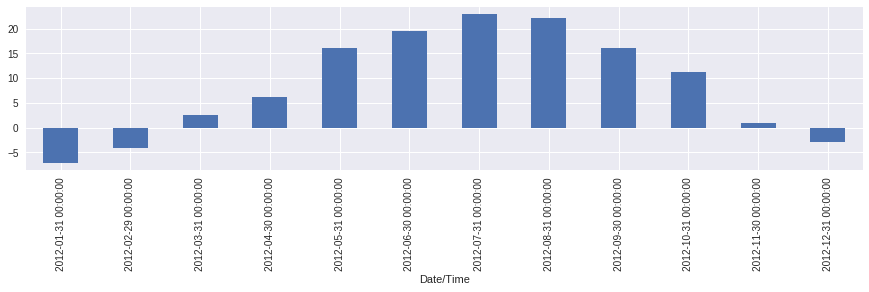

In [65]:
w12.index = pd.to_datetime(w12.index)
w12['Temp (C)'].resample('M').apply(np.median).plot(kind='bar')

In [68]:
is_snowing.index = pd.to_datetime(is_snowing.index)
pct_snowing = is_snowing.astype(float).resample('M').apply(np.mean)
pct_snowing

Date/Time
2012-01-31    0.240591
2012-02-29    0.162356
2012-03-31    0.087366
2012-04-30    0.015278
2012-05-31    0.000000
2012-06-30    0.000000
2012-07-31    0.000000
2012-08-31    0.000000
2012-09-30    0.000000
2012-10-31    0.000000
2012-11-30    0.038889
2012-12-31    0.251344
Freq: M, Name: Weather, dtype: float64

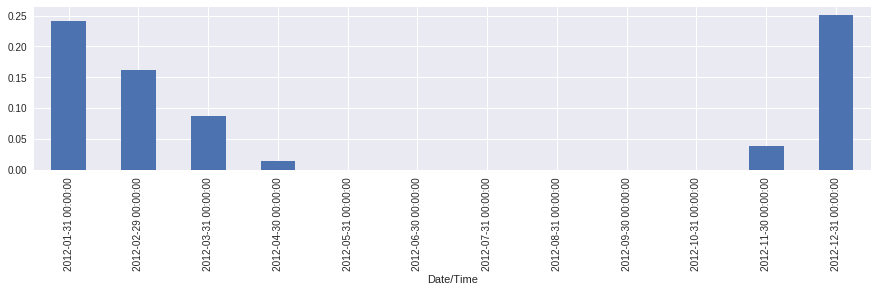

In [69]:
pct_snowing.plot(kind='bar')

In [70]:
temps = w12['Temp (C)'].resample('M').apply(np.mean)

In [74]:
temps.name = "Temperature"
pct_snowing.name = "Snowiness"

In [76]:
stats = pd.concat([temps, pct_snowing], axis=1)

In [77]:
stats

,Temperature,Snowiness
Date/Time,,
2012-01-31,-7.371505,0.240591
2012-02-29,-4.225000,0.162356
2012-03-31,3.121237,0.087366
2012-04-30,7.009306,0.015278
2012-05-31,16.237769,0.000000
2012-06-30,20.134028,0.000000
2012-07-31,22.790054,0.000000
2012-08-31,22.279301,0.000000
2012-09-30,16.484444,0.000000


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f49a6f30320>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f49a6e12a90>], dtype=object)

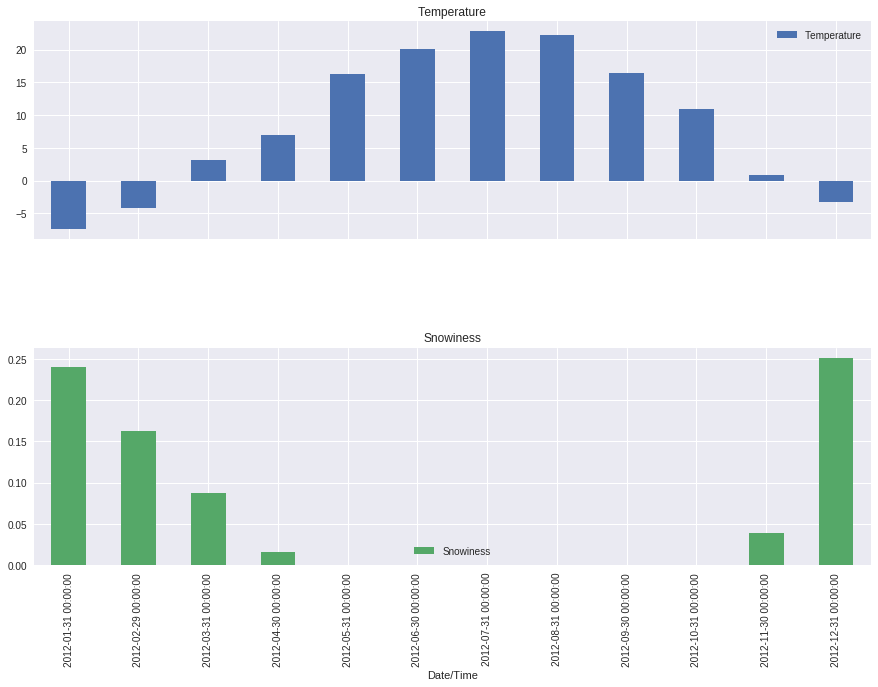

In [79]:
stats.plot(kind='bar', subplots=True, figsize=(15,10))